### BADASS Analysis - can we tell the difference between: (i) nucleobases and nucleosides; (ii) purines and pyrimidines; (iii) A, G, T and C?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Nucleobase and Nucleoside data

In [3]:
nn_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/NNs/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/NNs/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/NNs/?y


Locate xlsx files

In [4]:
nn_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [5]:
nn_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/As_Cs_Gs_Ts_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/NNs/Reformatted_NN_csvs/A_C_G_T_repeat_4.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [6]:
nn_fluor_data.combine_plate_readings()

In [7]:
nn_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.982040,0.968586,0.967833,0.988983,1.022954,0.996254,0.980076,0.943273,1.061828,0.983604,1.013717,0.950677,1.016804,1.043645,Cs
1,1.003324,1.134371,0.970403,0.981907,0.993050,0.985700,0.948293,0.898252,0.979910,0.981275,0.950367,0.929609,0.981335,1.074406,A
2,0.854868,1.204770,1.000226,1.002539,0.995212,1.043867,0.989404,0.776813,1.035186,0.903371,1.040798,0.998250,1.001610,1.099541,Gs
3,1.063806,1.333098,1.000206,1.025060,0.985978,1.025270,0.988769,0.974977,1.023747,1.005630,0.972924,0.925017,0.985493,1.115776,T
4,0.937316,1.122746,0.978107,0.998199,1.030451,1.025457,0.987849,0.787275,0.966838,0.919655,1.000703,0.963673,0.972092,1.058959,As
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.976962,1.220137,0.943520,0.929607,0.953369,0.961106,0.925819,0.821683,0.958506,0.933237,1.015854,0.920796,0.934740,1.286458,T
156,0.921441,1.270465,1.004370,1.002937,1.039770,1.017055,1.015455,0.826454,1.042473,0.916693,1.021211,0.942083,0.968164,1.089762,As
157,1.042951,1.212173,0.991896,1.000798,0.966762,0.950237,0.994297,0.987197,1.098034,1.037030,1.019081,0.913869,1.016207,1.253314,C
158,0.921859,1.128356,0.955268,0.987352,1.001721,1.101705,0.947618,0.804620,0.893762,0.905862,0.986932,0.982476,0.973597,1.255948,Ts


Create dataframes of merged class data. Classes compared are:
- nucleobases vs. nucleosides
- purines vs. pyrimidines
- A vs. T vs. C vs. G

In [8]:
nside_nbase_fluor_data = copy.deepcopy(nn_fluor_data.ml_fluor_data)
label_conv_dict = {'A': 'Nucleobase',
                   'C': 'Nucleobase',
                   'T': 'Nucleobase',
                   'G': 'Nucleobase',
                   'As': 'Nucleoside',
                   'Cs': 'Nucleoside',
                   'Ts': 'Nucleoside',
                   'Gs': 'Nucleoside'}
analyte_list = [label_conv_dict[nside_nbase_fluor_data['Analyte'].tolist()[n]]
                for n in range(nside_nbase_fluor_data.shape[0])]
nside_nbase_fluor_data['Analyte'] = analyte_list

In [9]:
nside_nbase_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.982040,0.968586,0.967833,0.988983,1.022954,0.996254,0.980076,0.943273,1.061828,0.983604,1.013717,0.950677,1.016804,1.043645,Nucleoside
1,1.003324,1.134371,0.970403,0.981907,0.993050,0.985700,0.948293,0.898252,0.979910,0.981275,0.950367,0.929609,0.981335,1.074406,Nucleobase
2,0.854868,1.204770,1.000226,1.002539,0.995212,1.043867,0.989404,0.776813,1.035186,0.903371,1.040798,0.998250,1.001610,1.099541,Nucleoside
3,1.063806,1.333098,1.000206,1.025060,0.985978,1.025270,0.988769,0.974977,1.023747,1.005630,0.972924,0.925017,0.985493,1.115776,Nucleobase
4,0.937316,1.122746,0.978107,0.998199,1.030451,1.025457,0.987849,0.787275,0.966838,0.919655,1.000703,0.963673,0.972092,1.058959,Nucleoside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.976962,1.220137,0.943520,0.929607,0.953369,0.961106,0.925819,0.821683,0.958506,0.933237,1.015854,0.920796,0.934740,1.286458,Nucleobase
156,0.921441,1.270465,1.004370,1.002937,1.039770,1.017055,1.015455,0.826454,1.042473,0.916693,1.021211,0.942083,0.968164,1.089762,Nucleoside
157,1.042951,1.212173,0.991896,1.000798,0.966762,0.950237,0.994297,0.987197,1.098034,1.037030,1.019081,0.913869,1.016207,1.253314,Nucleobase
158,0.921859,1.128356,0.955268,0.987352,1.001721,1.101705,0.947618,0.804620,0.893762,0.905862,0.986932,0.982476,0.973597,1.255948,Nucleoside


In [10]:
pur_pyr_fluor_data = copy.deepcopy(nn_fluor_data.ml_fluor_data)
label_conv_dict = {'A': 'Purine',
                   'C': 'Pyrimidine',
                   'T': 'Pyrimidine',
                   'G': 'Purine',
                   'As': 'Purine',
                   'Cs': 'Pyrimidine',
                   'Ts': 'Pyrimidine',
                   'Gs': 'Purine'}
analyte_list = [label_conv_dict[pur_pyr_fluor_data['Analyte'].tolist()[n]]
                for n in range(pur_pyr_fluor_data.shape[0])]
pur_pyr_fluor_data['Analyte'] = analyte_list

In [11]:
pur_pyr_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.982040,0.968586,0.967833,0.988983,1.022954,0.996254,0.980076,0.943273,1.061828,0.983604,1.013717,0.950677,1.016804,1.043645,Pyrimidine
1,1.003324,1.134371,0.970403,0.981907,0.993050,0.985700,0.948293,0.898252,0.979910,0.981275,0.950367,0.929609,0.981335,1.074406,Purine
2,0.854868,1.204770,1.000226,1.002539,0.995212,1.043867,0.989404,0.776813,1.035186,0.903371,1.040798,0.998250,1.001610,1.099541,Purine
3,1.063806,1.333098,1.000206,1.025060,0.985978,1.025270,0.988769,0.974977,1.023747,1.005630,0.972924,0.925017,0.985493,1.115776,Pyrimidine
4,0.937316,1.122746,0.978107,0.998199,1.030451,1.025457,0.987849,0.787275,0.966838,0.919655,1.000703,0.963673,0.972092,1.058959,Purine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.976962,1.220137,0.943520,0.929607,0.953369,0.961106,0.925819,0.821683,0.958506,0.933237,1.015854,0.920796,0.934740,1.286458,Pyrimidine
156,0.921441,1.270465,1.004370,1.002937,1.039770,1.017055,1.015455,0.826454,1.042473,0.916693,1.021211,0.942083,0.968164,1.089762,Purine
157,1.042951,1.212173,0.991896,1.000798,0.966762,0.950237,0.994297,0.987197,1.098034,1.037030,1.019081,0.913869,1.016207,1.253314,Pyrimidine
158,0.921859,1.128356,0.955268,0.987352,1.001721,1.101705,0.947618,0.804620,0.893762,0.905862,0.986932,0.982476,0.973597,1.255948,Pyrimidine


In [12]:
actg_fluor_data = copy.deepcopy(nn_fluor_data.ml_fluor_data)
label_conv_dict = {'A': 'a',
                   'C': 'c',
                   'T': 't',
                   'G': 'g',
                   'As': 'a',
                   'Cs': 'c',
                   'Ts': 't',
                   'Gs': 'g'}
analyte_list = [label_conv_dict[actg_fluor_data['Analyte'].tolist()[n]] for n in range(actg_fluor_data.shape[0])]
actg_fluor_data['Analyte'] = analyte_list

In [13]:
actg_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,0.982040,0.968586,0.967833,0.988983,1.022954,0.996254,0.980076,0.943273,1.061828,0.983604,1.013717,0.950677,1.016804,1.043645,c
1,1.003324,1.134371,0.970403,0.981907,0.993050,0.985700,0.948293,0.898252,0.979910,0.981275,0.950367,0.929609,0.981335,1.074406,a
2,0.854868,1.204770,1.000226,1.002539,0.995212,1.043867,0.989404,0.776813,1.035186,0.903371,1.040798,0.998250,1.001610,1.099541,g
3,1.063806,1.333098,1.000206,1.025060,0.985978,1.025270,0.988769,0.974977,1.023747,1.005630,0.972924,0.925017,0.985493,1.115776,t
4,0.937316,1.122746,0.978107,0.998199,1.030451,1.025457,0.987849,0.787275,0.966838,0.919655,1.000703,0.963673,0.972092,1.058959,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.976962,1.220137,0.943520,0.929607,0.953369,0.961106,0.925819,0.821683,0.958506,0.933237,1.015854,0.920796,0.934740,1.286458,t
156,0.921441,1.270465,1.004370,1.002937,1.039770,1.017055,1.015455,0.826454,1.042473,0.916693,1.021211,0.942083,0.968164,1.089762,a
157,1.042951,1.212173,0.991896,1.000798,0.966762,0.950237,0.994297,0.987197,1.098034,1.037030,1.019081,0.913869,1.016207,1.253314,c
158,0.921859,1.128356,0.955268,0.987352,1.001721,1.101705,0.947618,0.804620,0.893762,0.905862,0.986932,0.982476,0.973597,1.255948,t


Generates "representative" fingerprint for each class (by selecting a sample at random)

Nucleosides vs. nucleobases

Nucleoside


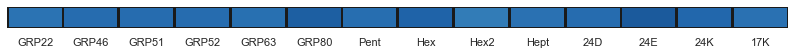

Nucleobase


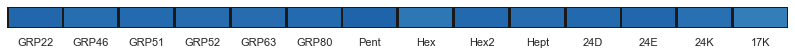

In [14]:
classes = []
for class_name in nside_nbase_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
nside_nbase_fluor_data_x_val = nside_nbase_fluor_data.drop(['Analyte'], axis=1)
vmin = nside_nbase_fluor_data_x_val.values.min()
vmax = nside_nbase_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(nside_nbase_fluor_data.shape[0])
                     if nside_nbase_fluor_data['Analyte'][n] == class_name]
    random_index = random.choice(class_indices)
    repr_array = nside_nbase_fluor_data_x_val.values[random_index, :]

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=nside_nbase_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Purines vs. pyrimidines

Pyrimidine


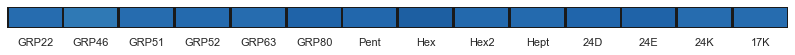

Purine


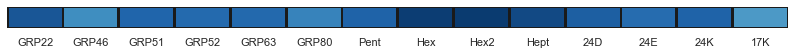

In [15]:
classes = []
for class_name in pur_pyr_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
pur_pyr_fluor_data_x_val = pur_pyr_fluor_data.drop(['Analyte'], axis=1)
vmin = pur_pyr_fluor_data_x_val.values.min()
vmax = pur_pyr_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(pur_pyr_fluor_data.shape[0])
                     if pur_pyr_fluor_data['Analyte'][n] == class_name]
    random_index = random.choice(class_indices)
    repr_array = pur_pyr_fluor_data_x_val.values[random_index, :]

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=pur_pyr_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

A vs. T vs. C vs. G

c


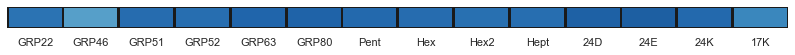

a


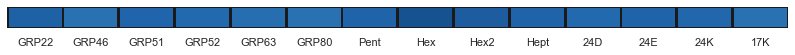

g


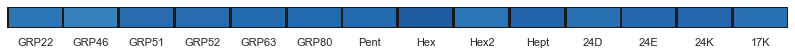

t


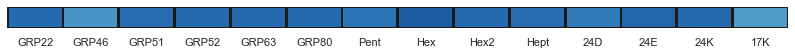

In [16]:
classes = []
for class_name in actg_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
actg_fluor_data_x_val = actg_fluor_data.drop(['Analyte'], axis=1)
vmin = actg_fluor_data_x_val.values.min()
vmax = actg_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(actg_fluor_data.shape[0]) if actg_fluor_data['Analyte'][n] == class_name]
    random_index = random.choice(class_indices)
    repr_array = actg_fluor_data_x_val.values[random_index, :]

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=actg_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

#### Run machine learning

In [17]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### - Nucleosides vs. nucleobases

First split the data into a training and test set

In [18]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/'
                'NNs/NN_ML_results_nbase_nside_split/',
    fluor_data=nside_nbase_fluor_data
)

In [19]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

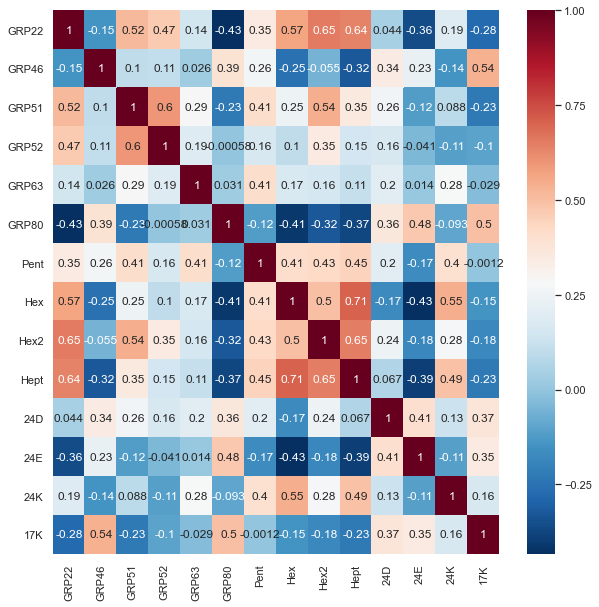

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
GRP22,1.000000,-0.145459,0.517204,0.468256,0.144208,-0.432641,0.345274,0.566899,0.653451,0.638070,0.043950,-0.360005,0.192649,-0.276204
GRP46,-0.145459,1.000000,0.104178,0.107647,0.026307,0.389048,0.262367,-0.250730,-0.055250,-0.321496,0.343168,0.230611,-0.144855,0.535823
GRP51,0.517204,0.104178,1.000000,0.601043,0.287053,-0.230156,0.410975,0.248034,0.543842,0.354726,0.258877,-0.118941,0.087654,-0.227804
GRP52,0.468256,0.107647,0.601043,1.000000,0.192087,-0.000580,0.163539,0.100671,0.347952,0.151658,0.161552,-0.040821,-0.109932,-0.102010
GRP63,0.144208,0.026307,0.287053,0.192087,1.000000,0.030769,0.410585,0.170441,0.157530,0.113747,0.200812,0.013506,0.278486,-0.029190
GRP80,-0.432641,0.389048,-0.230156,-0.000580,0.030769,1.000000,-0.118581,-0.410767,-0.324543,-0.371074,0.364388,0.479131,-0.093469,0.496531
Pent,0.345274,0.262367,0.410975,0.163539,0.410585,-0.118581,1.000000,0.414166,0.426163,0.449537,0.199666,-0.169527,0.396182,-0.001166
Hex,0.566899,-0.250730,0.248034,0.100671,0.170441,-0.410767,0.414166,1.000000,0.501556,0.706718,-0.171897,-0.433218,0.546490,-0.147366
Hex2,0.653451,-0.055250,0.543842,0.347952,0.157530,-0.324543,0.426163,0.501556,1.000000,0.650601,0.244800,-0.184279,0.276954,-0.177777
Hept,0.638070,-0.321496,0.354726,0.151658,0.113747,-0.371074,0.449537,0.706718,0.650601,1.000000,0.067133,-0.393370,0.494574,-0.226811


In [20]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

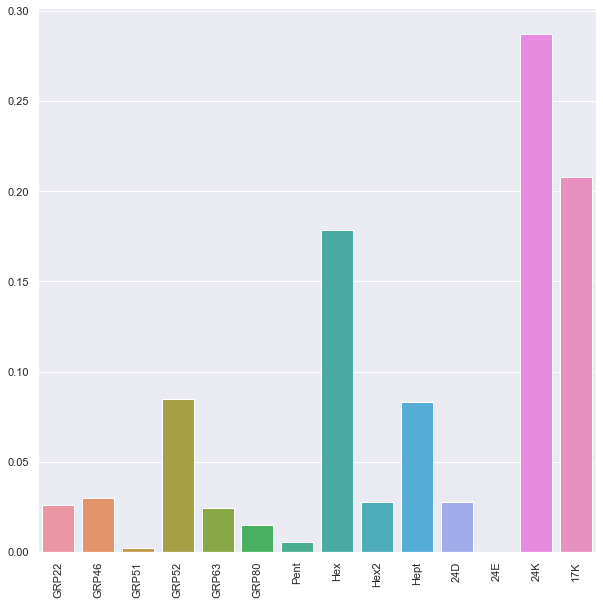

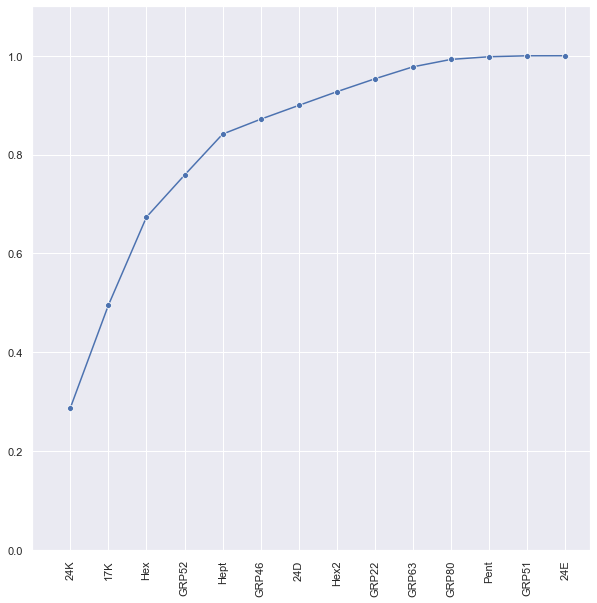

,Feature,Score
0,24K,0.287094
1,17K,0.208050
2,Hex,0.178404
3,GRP52,0.084994
4,Hept,0.082947
5,GRP46,0.030137
6,24D,0.027961
7,Hex2,0.027664
8,GRP22,0.026139
9,GRP63,0.024227


In [21]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

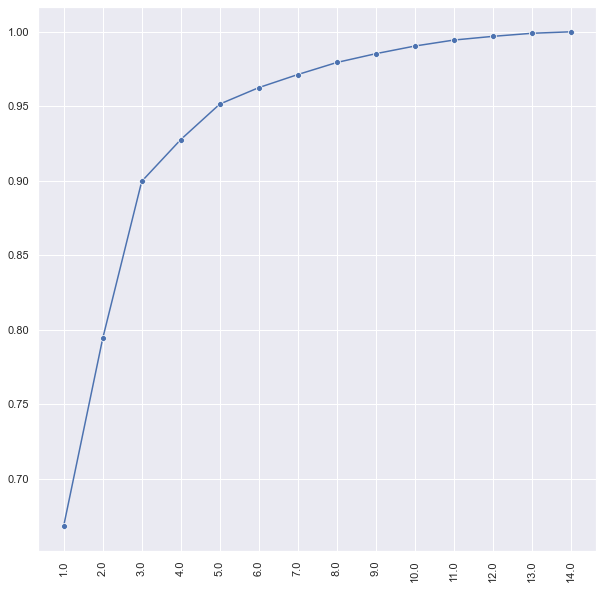

In [22]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [23]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [24]:
pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,-0.049878,0.221747,-0.015230,-0.009275,-0.013152,0.066465,-0.016264,-0.100759,-0.061053,-0.050513,0.069364,0.050352,0.000633,0.958848
2,-0.244116,0.551245,-0.037661,-0.000820,-0.014674,0.205673,-0.041522,-0.513865,-0.327319,-0.343017,-0.001014,0.102772,-0.164028,-0.254075
3,0.211276,0.758945,0.096247,0.061645,0.054763,-0.018296,0.230310,0.330352,0.360088,0.189955,0.123383,-0.058832,0.085966,-0.094719
4,0.061493,-0.188949,0.076323,0.077832,0.093431,0.420189,0.020012,-0.393896,0.476928,0.138079,0.506414,0.321329,0.016375,-0.035914
5,0.287106,0.035211,0.108736,0.079305,-0.073037,-0.681577,-0.159158,-0.428128,0.318205,-0.090306,-0.025525,-0.055186,-0.325274,0.028304
6,-0.517624,0.013775,-0.050852,-0.213538,0.080538,-0.496086,0.301821,-0.139850,0.027274,0.098539,0.172577,0.224048,0.478962,-0.024707
7,-0.490593,0.048729,-0.132176,-0.163820,-0.191392,0.096468,-0.345471,0.207803,0.582874,-0.227741,-0.290818,0.098142,-0.135273,0.007281
8,0.169212,0.013769,0.094368,0.069004,0.081987,-0.184713,-0.207728,0.393155,-0.182325,-0.348730,0.227545,0.711892,-0.070268,-0.024276
9,-0.199379,0.050170,-0.070020,-0.111113,-0.197473,-0.109050,-0.413045,0.167220,-0.148606,0.093208,0.702860,-0.383479,-0.131369,-0.043918


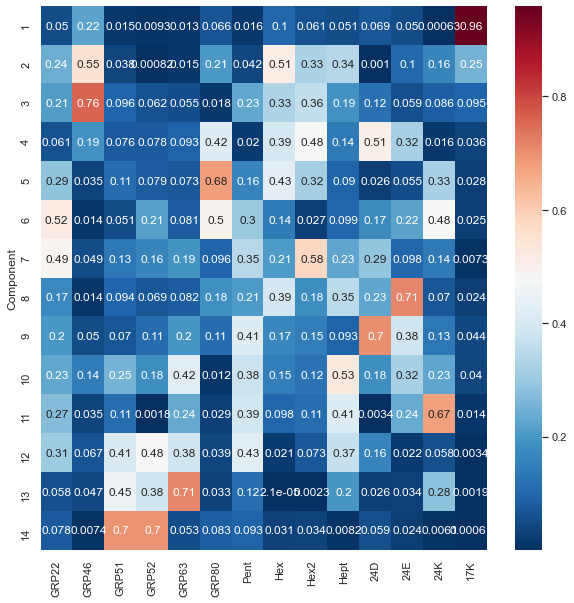

In [25]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [26]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [27]:
relative_pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.015712,0.101570,0.005834,0.003669,0.005040,0.026862,0.005191,0.033898,0.021557,0.016323,0.027213,0.019025,0.000238,0.625820
2,0.076898,0.252495,0.014427,0.000324,0.005624,0.083123,0.013253,0.172877,0.115574,0.110841,0.000398,0.038832,0.061750,0.165830
3,0.066553,0.347632,0.036870,0.024385,0.020987,0.007394,0.073509,0.111139,0.127144,0.061381,0.048406,0.022229,0.032363,0.061821
4,0.019371,0.086547,0.029237,0.030788,0.035806,0.169821,0.006387,0.132516,0.168399,0.044618,0.198678,0.121412,0.006165,0.023440
5,0.090441,0.016128,0.041654,0.031370,0.027990,0.275461,0.050800,0.144033,0.112356,0.029181,0.010014,0.020852,0.122453,0.018473
6,0.163055,0.006310,0.019480,0.084468,0.030865,0.200494,0.096334,0.047049,0.009630,0.031842,0.067706,0.084655,0.180311,0.016126
7,0.154540,0.022320,0.050633,0.064802,0.073347,0.038988,0.110266,0.069910,0.205808,0.073592,0.114095,0.037082,0.050925,0.004752
8,0.053303,0.006307,0.036150,0.027296,0.031420,0.074652,0.066302,0.132267,0.064377,0.112687,0.089271,0.268985,0.026453,0.015845
9,0.062806,0.022980,0.026823,0.043952,0.075678,0.044073,0.131834,0.056257,0.052472,0.030119,0.275748,0.144896,0.049455,0.028664


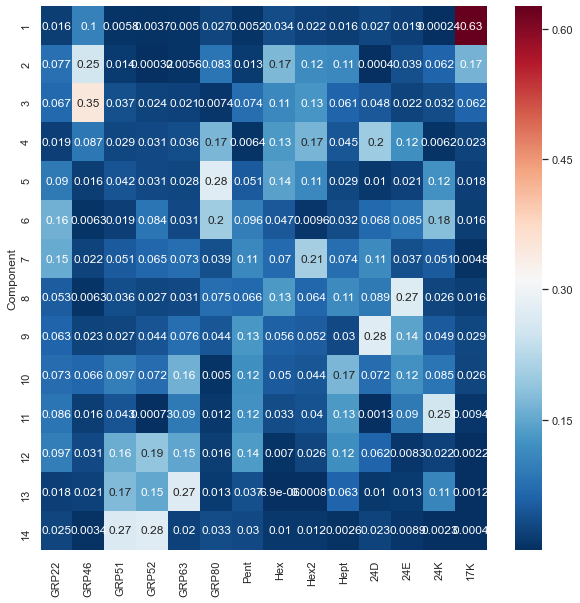

In [28]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

In [29]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    cat_colours = {}
    for index, cat in enumerate(categories):
        cat_colours[cat] = colours[index]

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(x_data[:,0], x_data[:,1], c=[cat_colours[y] for y in y_data])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(x_data[:,0], x_data[:,1], x_data[:,2], c=[cat_colours[y] for y in y_data])

    legend_elements = []
    for cat, colour in cat_colours.items():
        legend_elements.append(Line2D([0], [0], marker='o', color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

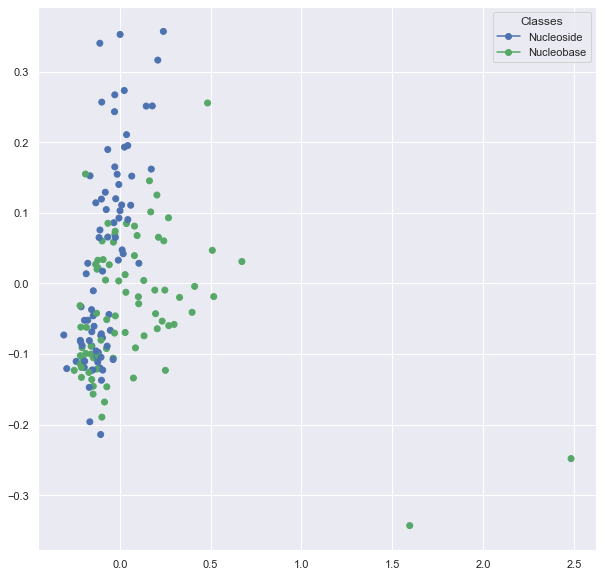

In [30]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['Nucleoside', 'Nucleobase'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

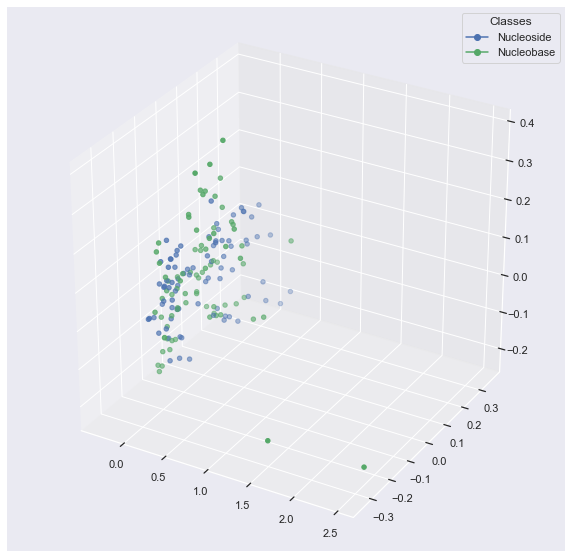

In [31]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['Nucleoside', 'Nucleobase'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

~95% of the variation in the data can be accounted for with 5 components, so will transform the data to 5 (rather than 14) dimensions

In [32]:
n_components = 5

Runs randomized search to spot check 6 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation from 14 to 5 dimensions using PCA
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [39]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
random_forest = RandomForestClassifier(n_jobs=-1)
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc, random_forest]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.0031622776601683794}
Best score: 0.6787692307692308






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.0031622776601683794}
Best score: 0.6787692307692308
All parameter combinations tested:
1 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 31622.776601683792} 0.633
2 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.001} nan
3 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class'

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.03125}
Best score: 0.6332307692307693
Range tested: [3.12500000e-02 4.41941738e-02 6.25000000e-02 8.83883476e-02
 1.25000000e-01 1.76776695e-01 2.50000000e-01 3.53553391e-01
 5.00000000e-01 7.07106781e-01 1.00000000e+00 1.41421356e+00
 2.00000000e+00 2.82842712e+00 4.00000000e+00 5.65685425e+00
 8.00000000e+00 1.13137085e+01 1.60000000e+01 2.26274170e+01
 3.20000000e+01 4.52548340e+01 6.40000000e+01 9.05096680e+01
 1.28000000e+02 1.81019336e+02 2.56000000e+02 3.62038672e+02
 5.12000000e+02 7.24077344e+02 1.02400000e+03 1.44815469e+03
 2.04800000e+03 2.89630938e+03 4.09600000e+03 5.79261875e+03
 8.19200000e+03 1.15852375e+04 1.63840000e+04 2.31704750e+04
 3.27680000e+04]
Value selected: 0.03125






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.03125}
Best score: 0.6332307692307693
All parameter combinations tested:
1 {'LinearSVC__C': 0.03125} 0.633
2 {'LinearSVC__C': 16384.0} 0.633
3 {'L

In [40]:
score_df

,Algorithm,Resampling_method,Best_params,Best_accuracy_score,Mean_accuracy_score,Std_dev_accuracy_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'lbfgs', 'Logis...",0.678769,0.632120,0.044505
1,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'uniform', '...",0.704000,0.667606,0.084147
2,GaussianNB,no_balancing,{},0.631692,0.631692,0.100901
3,LinearSVC,no_balancing,{'LinearSVC__C': 0.03125},0.633231,0.633231,0.077222
4,SVC,no_balancing,"{'SVC__gamma': 0.02209708691207961, 'SVC__C': ...",0.655385,0.584751,0.051403
5,RandomForestClassifier,no_balancing,"{'RandomForestClassifier__n_estimators': 31, '...",0.670462,0.640677,0.116762


So, from this spot check, a **k nearest neighbours classifier** does a good job.

So, run hyperparameter optimisation for k nearest neighbours.

In [41]:
fixed_params = ml.define_fixed_model_params(clf=KNeighborsClassifier())
random_tuned_params = ml.define_tuned_model_params(clf=KNeighborsClassifier(), x_train=ml.train_x)

knn_random_search = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 17}
Best score: 0.7184615384615385


In [42]:
grid_tuned_params = {'n_neighbors': [int(n) for n in range(2, 30)],
                     'weights': ['uniform', 'distance'],
                     'p': np.array([1, 2])}

knn_grid_search = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'KNeighborsClassifier__n_neighbors': 25, 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__weights': 'distance'}
Best score: 0.7276923076923076


### So, optimal hyperparameter combination:
- n_neighbours = 25

(Total number of neighbours = 31 in test set, 24/25 in validation sets during 5-fold CV)

- weights = 'distance'
- p = 1

Model cross-validation score: [0.53846154 0.73076923 0.5        0.72       0.6       ]
accuracy_score: 0.71875
recall_score: 0.7196078431372549
precision_score: 0.71875
f1_score: 0.7184750733137829
cohen_kappa_score: 0.4375
None


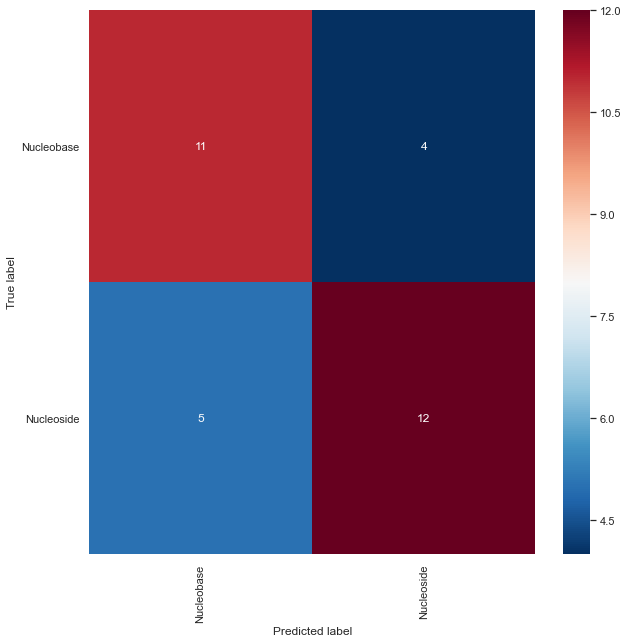

true


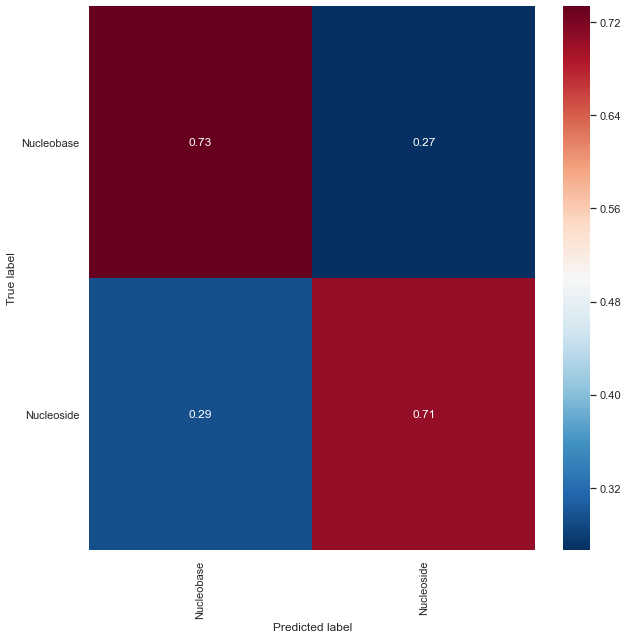

pred


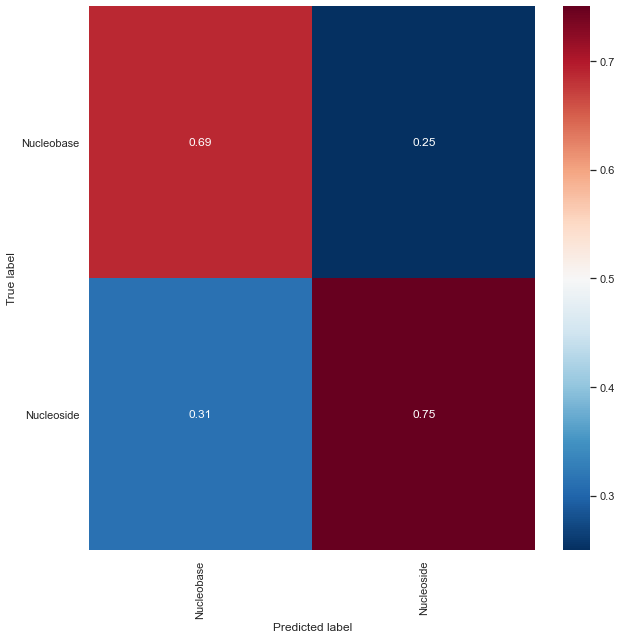

In [43]:
final_params = {'n_neighbors': 25,
                'weights': 'distance',
                'p': 1}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

knn_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

From looking at the wide variance in the accuracy scores obtained on the different cross-validation folds, an accuracy of 0.72 (2sf) is likely by random chance an over-estimate of the performance of the model on data it hasn't seen before (the average cross-validation score is 0.62 (2sf)). However, it is clear that the model performs better than random guess (for which the expected accuracy is 0.5).

How well does the trained classifier predict the different classes?

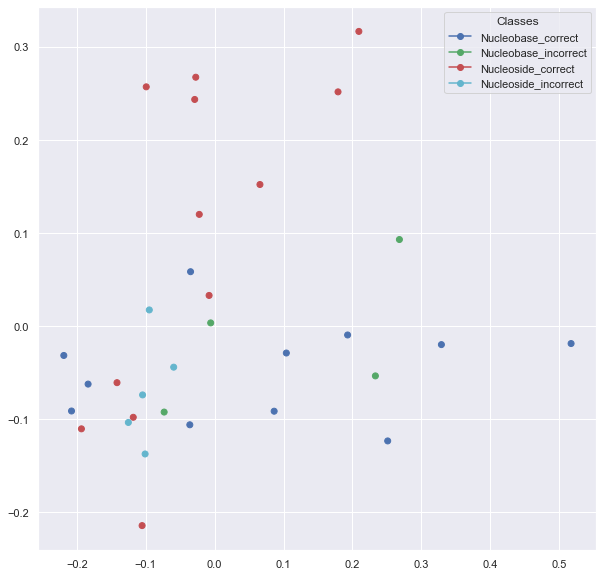

In [47]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['Nucleobase_correct', 'Nucleobase_incorrect', 'Nucleoside_correct', 'Nucleoside_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

#### - Purines vs. pyrimidines

First split the data into a training and test set

In [48]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/'
                'NNs/NN_ML_results_pur_pyr_split/',
    fluor_data=pur_pyr_fluor_data
)

In [49]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Measure the relative importances of the initial 14 features

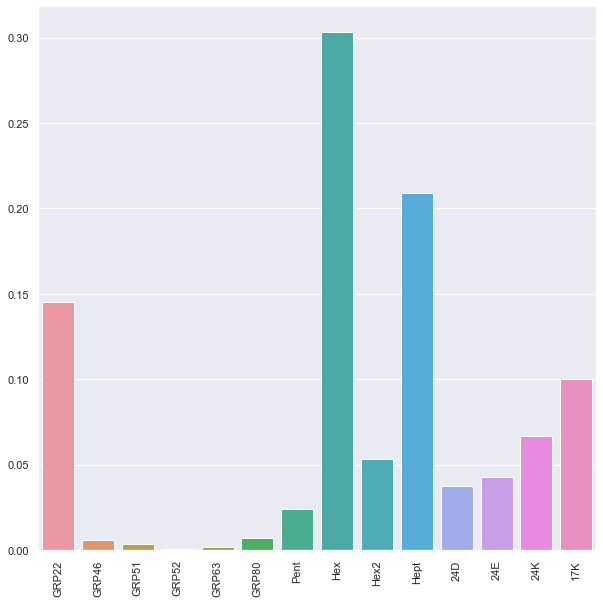

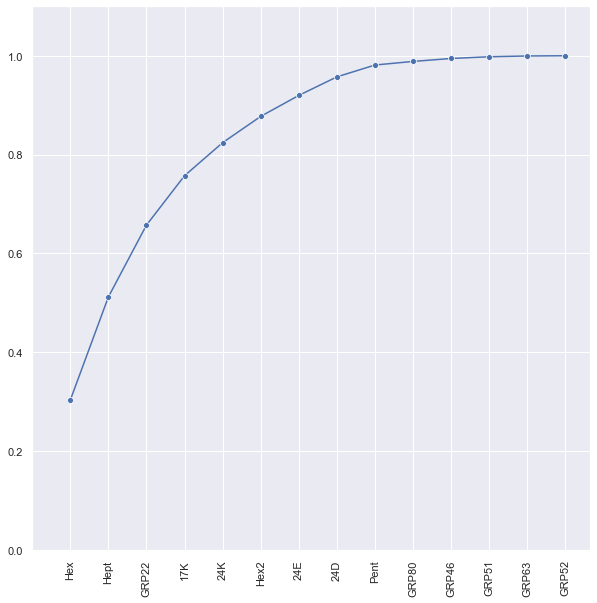

,Feature,Score
0,Hex,0.303116
1,Hept,0.208741
2,GRP22,0.145437
3,17K,0.099966
4,24K,0.066846
5,Hex2,0.053180
6,24E,0.042486
7,24D,0.037494
8,Pent,0.023981
9,GRP80,0.007230


In [51]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- PCA to determine the number of dimensions to reduce the data to has already been run (see above for Scree plot and heatmaps) => n_components = 5

Scatter plots of data transformed to PCA dimensions

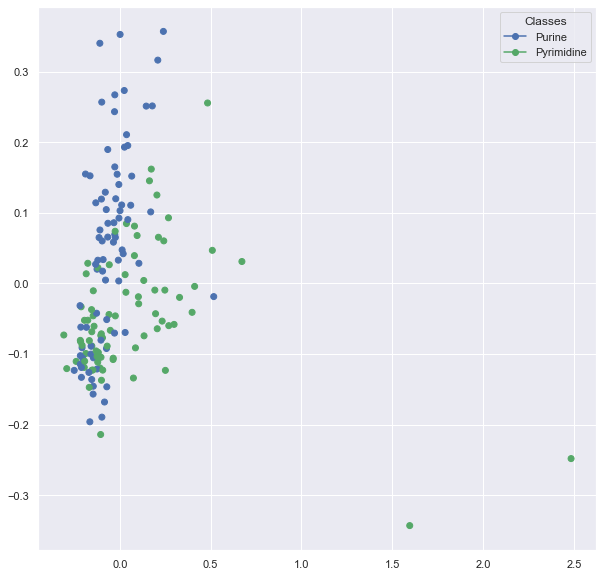

In [57]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['Purine', 'Pyrimidine'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

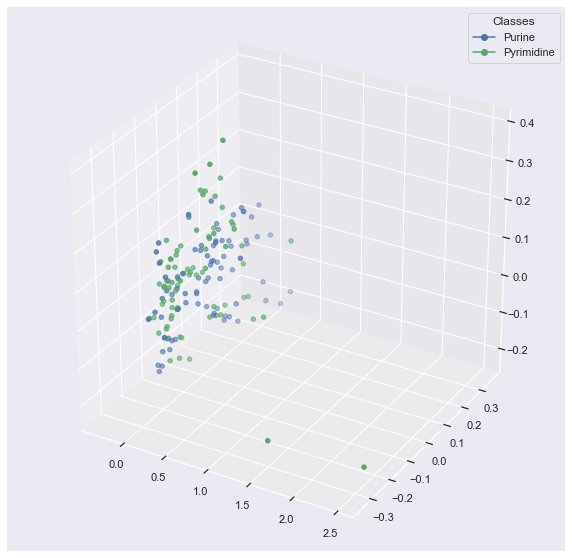

In [58]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['Purine', 'Pyrimidine'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

~95% of the variation in the data can be accounted for with 5 components, so will transform the data to 5 (rather than 14) dimensions

In [59]:
n_components = 5

Runs randomized search to spot check 6 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation from 14 to 5 dimensions using PCA
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [60]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
random_forest = RandomForestClassifier(n_jobs=-1)
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc, random_forest]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3.1622776601683795}
Best score: 0.7181538461538463






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3.1622776601683795}
Best score: 0.7181538461538463
All parameter combinations tested:
1 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 1000.0} 0.695
2 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10000.0} 0.695
3 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 181.01933598375618}
Best score: 0.7101538461538461






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 181.01933598375618}
Best score: 0.7101538461538461
All parameter combinations tested:
1 {'LinearSVC__C': 181.01933598375618} 0.71
2 {'LinearSVC__C': 2.0} 0.71
3 {'LinearSVC__C': 2.8284271247461903} 0.71
4 {'LinearSVC__C': 2896.309375740099} 0.71
5 {'LinearSVC__C': 0.08838834764831845} 0.71
6 {'LinearSVC__C': 16384.0} 0.71
7 {'LinearSVC__C': 8.0} 0.71
8 {'LinearSVC__C': 0.03125} 0.695
9 {'LinearSVC__C': 128.0} 0.71
10 {'LinearSVC__C': 0.125} 0.71
11 {'LinearSVC__C': 4096.0} 0.71
12 {'LinearSVC__C': 256.0} 0.71
13 {'LinearSVC__C': 1024.0} 0.71
14 {'LinearSVC__C': 90.50966799187809} 0.71
15 {'LinearSVC__C': 0.5} 0.71
16 {'LinearSVC__C': 8192.0} 0.71
17 {'LinearSVC__C': 32768.0} 0.71
18 {'LinearSVC__C': 4.0} 0.71
19 {'LinearSVC__C': 1448.1546878700494} 0.71
20 {'LinearSVC__C': 11.313708498984761

In [61]:
score_df

,Algorithm,Resampling_method,Best_params,Best_accuracy_score,Mean_accuracy_score,Std_dev_accuracy_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'sag', 'Logisti...",0.718154,0.672178,0.045540
1,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'distance', ...",0.686154,0.637711,0.088562
2,GaussianNB,no_balancing,{},0.578462,0.578462,0.053604
3,LinearSVC,no_balancing,{'LinearSVC__C': 181.01933598375618},0.710154,0.709538,0.057243
4,SVC,no_balancing,"{'SVC__gamma': 0.011048543456039806, 'SVC__C':...",0.735385,0.632148,0.066814
5,RandomForestClassifier,no_balancing,"{'RandomForestClassifier__n_estimators': 316, ...",0.726462,0.700972,0.053271


So, from this spot check, **support vector classifier with radial basis function  kernel** does a good job.

So, run hyperparameter optimisation for SVC.

In [62]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.04419417382415922, 'SVC__C': 0.3535533905932738}
Best score: 0.7175384615384616


In [64]:
grid_tuned_params = {'C': np.linspace(0.05, 1, 20),
                     'gamma': np.linspace(0.005, 0.1, 20)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='grid search', fixed_params=fixed_params, tuned_params=grid_tuned_params,
    train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=['no_balancing'], n_iter='',
    cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 0.9, 'SVC__gamma': 0.02}
Best score: 0.7033846153846154


### So, optimal hyperparameter combination:
- C = 0.9
- gamma = 0.02

Model cross-validation score: [0.73076923 0.65384615 0.76923077 0.52       0.72      ]
accuracy_score: 0.59375
recall_score: 0.6416666666666667
precision_score: 0.6471861471861472
f1_score: 0.5933528836754643
cohen_kappa_score: 0.24637681159420288
None


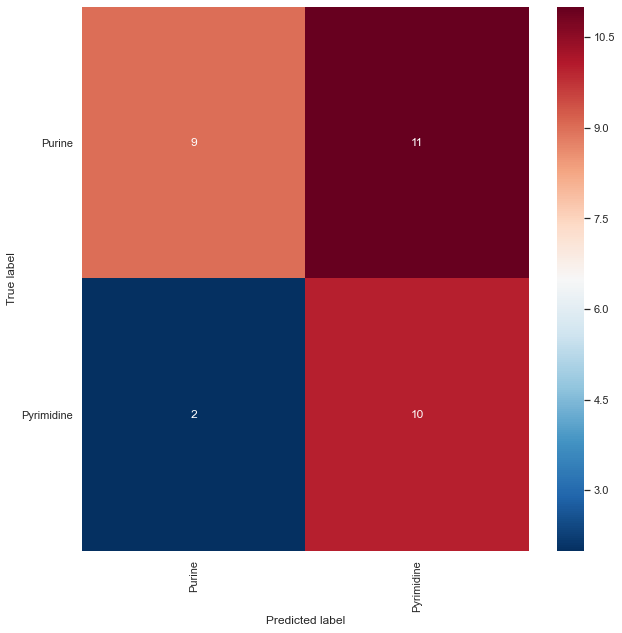

true


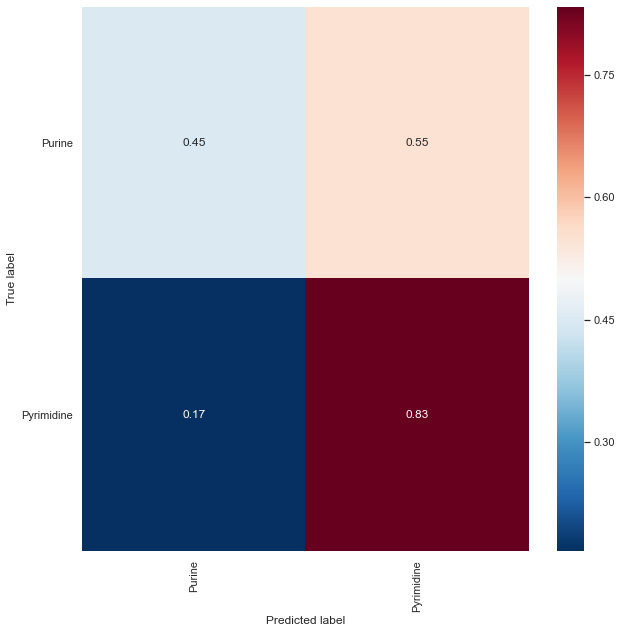

pred


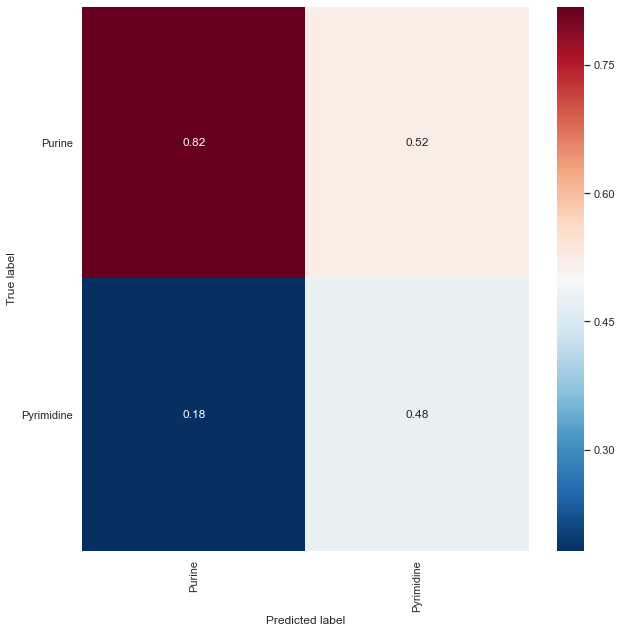

In [67]:
final_params = {'C': 0.9,
                'gamma': 0.02}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x, y_test=ml.test_y,
    n_components_pca=n_components, run='train', fixed_params=fixed_params, tuned_params=final_params,
    train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs, resampling_method=['no_balancing'],
    n_iter=n_iter, cv_folds=cv_folds
)

Similarly to the nucleoside vs. nucleobase classification, there is substantial variance in the accuracy of classification across the different folds. Therefore, in spite of the fact that the model does a poorer job of classifying the test data (accuracy = 0.59 (2sf)) as compared to the training data (average accuracy across 5-folds = 0.68 (2sf), standard deviation = 0.098 (2sf)), the model is unlikely to be overfitted.

How well does the trained classifier predict the different classes?

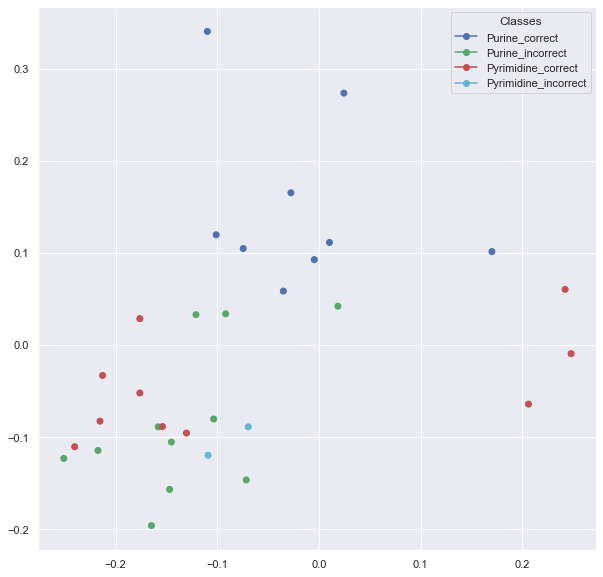

In [70]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['Purine_correct', 'Purine_incorrect', 'Pyrimidine_correct', 'Pyrimidine_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

#### - A vs. T vs. C vs. G

First split the data into a training and test set

In [71]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/'
                'NNs/NN_ML_results_actg_split/',
    fluor_data=actg_fluor_data
)

In [72]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Measure the relative importances of the initial 14 features

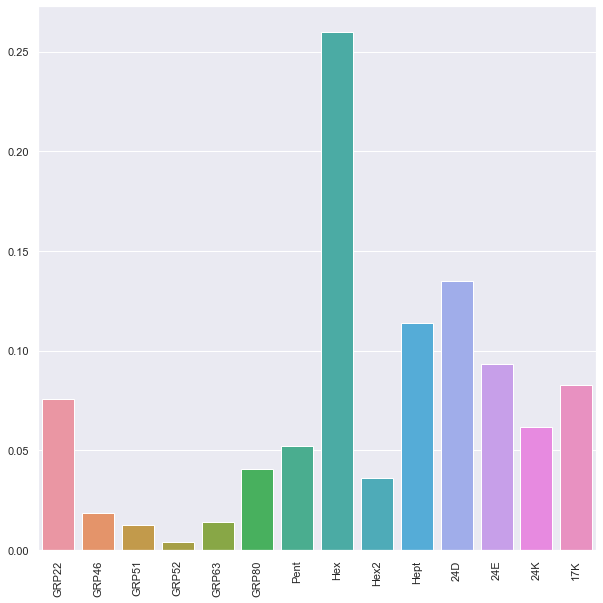

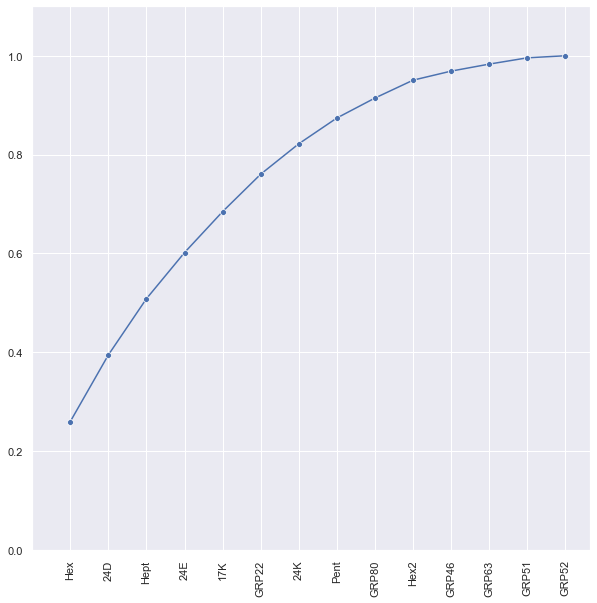

,Feature,Score
0,Hex,0.259726
1,24D,0.134920
2,Hept,0.113790
3,24E,0.093333
4,17K,0.082924
5,GRP22,0.075661
6,24K,0.061542
7,Pent,0.052159
8,GRP80,0.040401
9,Hex2,0.036127


In [73]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- PCA to determine the number of dimensions to reduce the data to has already been run (see above for Scree plot and heatmaps) => n_components = 5

Scatter plots of data transformed to PCA dimensions

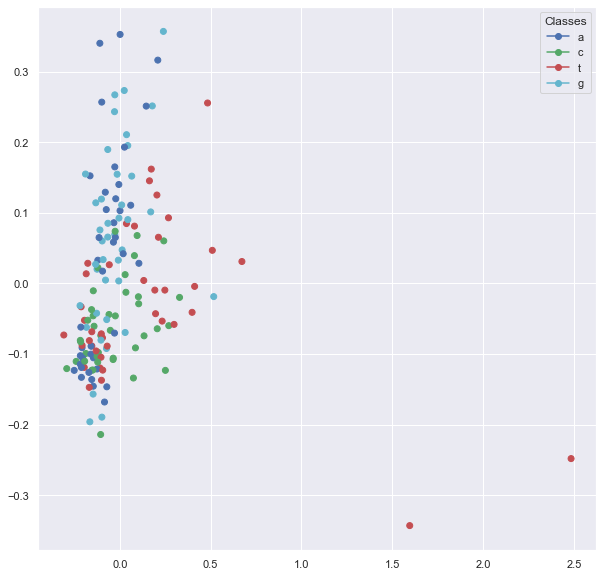

In [74]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['a', 'c', 't', 'g'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

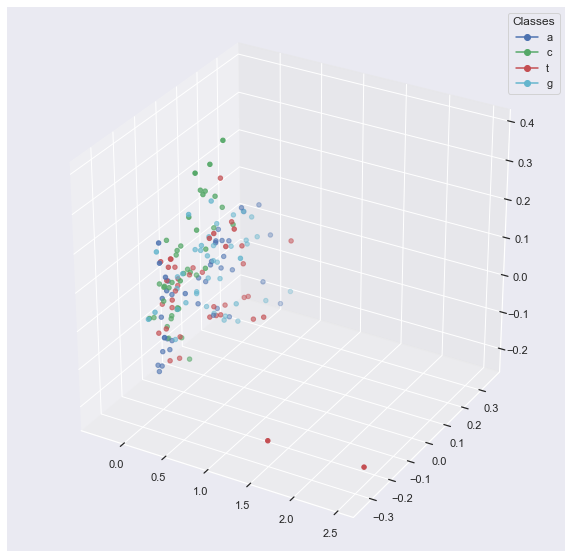

In [75]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['a', 'c', 't', 'g'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

~95% of the variation in the data can be accounted for with 5 components, so will transform the data to 5 (rather than 14) dimensions

In [76]:
n_components = 5

Runs randomized search to spot check 6 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation from 14 to 5 dimensions using PCA
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [77]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
random_forest = RandomForestClassifier(n_jobs=-1)
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc, random_forest]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.0031622776601683794}
Best score: 0.4215384615384615






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.0031622776601683794}
Best score: 0.4215384615384615
All parameter combinations tested:
1 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0.03162277660168379} 0.274
2 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.03162277660168379} 0.414
3 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l1', 'LogisticRe

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 1.0}
Best score: 0.4276923076923077






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 1.0}
Best score: 0.4276923076923077
All parameter combinations tested:
1 {'LinearSVC__C': 0.08838834764831845} 0.412
2 {'LinearSVC__C': 90.50966799187809} 0.42
3 {'LinearSVC__C': 362.03867196751236} 0.42
4 {'LinearSVC__C': 181.01933598375618} 0.42
5 {'LinearSVC__C': 0.3535533905932738} 0.42
6 {'LinearSVC__C': 1.0} 0.428
7 {'LinearSVC__C': 8192.0} 0.42
8 {'LinearSVC__C': 2896.309375740099} 0.42
9 {'LinearSVC__C': 0.04419417382415922} 0.412
10 {'LinearSVC__C': 16384.0} 0.42
11 {'LinearSVC__C': 1024.0} 0.42
12 {'LinearSVC__C': 4096.0} 0.42
13 {'LinearSVC__C': 8.0} 0.42
14 {'LinearSVC__C': 0.125} 0.42
15 {'LinearSVC__C': 0.1767766952966369} 0.42
16 {'LinearSVC__C': 2.0} 0.428
17 {'LinearSVC__C': 2.8284271247461903} 0.428
18 {'LinearSVC__C': 0.0625} 0.405
19 {'LinearSVC__C': 0.5} 0.42
20 {'LinearSVC__C': 1448.1

In [78]:
score_df

,Algorithm,Resampling_method,Best_params,Best_accuracy_score,Mean_accuracy_score,Std_dev_accuracy_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'lbfgs', 'Logis...",0.421538,0.385441,0.036880
1,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'uniform', '...",0.452615,0.410511,0.085937
2,GaussianNB,no_balancing,{},0.390462,0.390462,0.031967
3,LinearSVC,no_balancing,{'LinearSVC__C': 1.0},0.427692,0.419385,0.118832
4,SVC,no_balancing,"{'SVC__gamma': 6.103515625e-05, 'SVC__C': 4096.0}",0.461231,0.324222,0.054158
5,RandomForestClassifier,no_balancing,"{'RandomForestClassifier__n_estimators': 100, ...",0.430154,0.382178,0.094744


So, from this spot check, a **support vector classifier with radial basis function kernel**.

So, run hyperparameter optimisation for this model.

In [85]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.015625, 'SVC__C': 0.7071067811865476}
Best score: 0.44584615384615384


In [86]:
grid_tuned_params = {'C': np.linspace(0.1, 2, 20),
                     'gamma': np.linspace(0.001, 0.05, 50)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 0.5, 'SVC__gamma': 0.011}
Best score: 0.4135384615384615


### So, optimal hyperparameter combination:
- C = 0.5
- gamma = 0.011

Model cross-validation score: [0.38461538 0.38461538 0.46153846 0.36       0.36      ]
accuracy_score: 0.4375
recall_score: 0.45486111111111105
precision_score: 0.35
f1_score: 0.37232905982905984
cohen_kappa_score: 0.2586872586872587
None


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


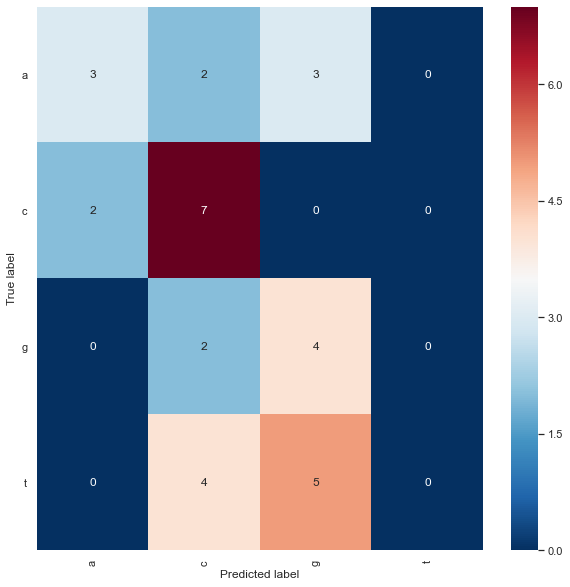

true


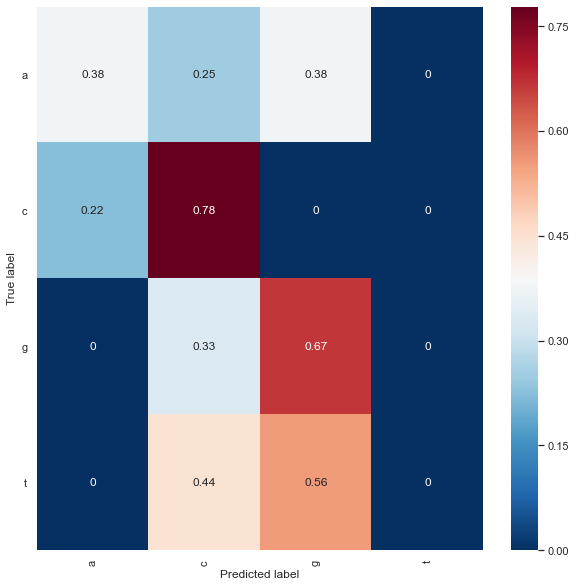

pred


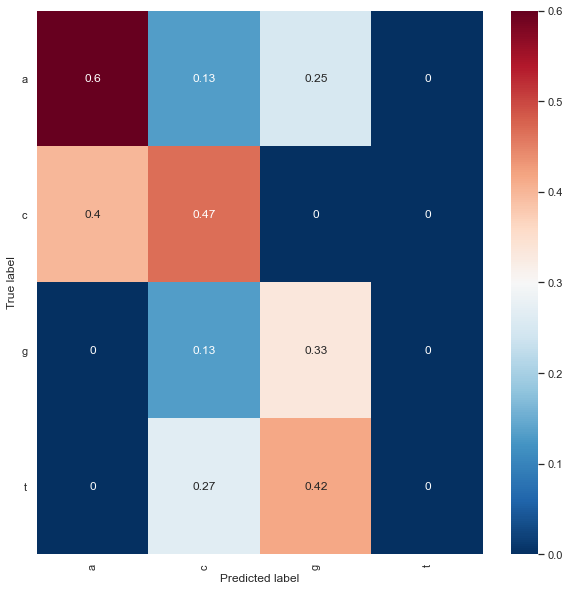

In [88]:
final_params = {'C': 0.5,
                'gamma': 0.011}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter=n_iter, cv_folds=cv_folds
)

The model performs fairly similarly on the test data as compared to the validation dataset during 5-fold cross-validation (average accuracy from 5-fold cross-validation = 0.39, std. dev. = 0.037). Interestingly the bases that are most commonly confused for one another are not the purines and pyrimidines (i.e. not a for g and c for t - the most common confusion is t for g (but not vice versa)).

How well does the trained classifier predict the different classes?

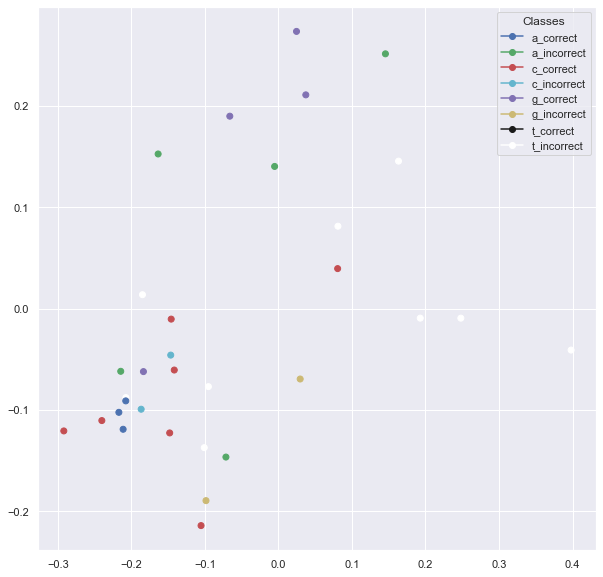

In [89]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['a_correct', 'a_incorrect', 'c_correct', 'c_incorrect',
                'g_correct', 'g_incorrect', 't_correct', 't_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)